# Climate Change 

<img src="Pictures/Обложка.png">



**Описание проекта**

    Данные взяты с сайта Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
    
    Проект призван людей разобраться в проблеме глобального потепления - а именно в существовании этой проблемы, ведь есть сторонники, которые утверждают, что глобальное потепление выдумка, завязанная на статистике - други утверждают, что явление глобального потепления реально. Изучение мировых температур поможет разобраться в этой проблеме, сформирует личное мнение на этот счет. А так же поможет в прогнозировании погоды, а именно температуры на следующие года.


**Описание данных** 

    Проект включает в себя данные по глобальной температуре Земли(как на суше, так и на водной поверхности). 
    Эти данные собраны с 1740-ых годов, под различными условиями, метриками и приборами, что создает некоторую сложность, и в тоже время интерес к ним. 
    В этот набор данных у нас есть несколько файлов:

    Глобальные температуры земли и океана и суши ( GlobalTemperas.csv ):

1. Date:    начинается в 1750 году для средней температуры земли и в 1850 году для максимальной и минимальной температуры земли и глобальной температуры океана и земли
2. LandAverageTempera:   средняя глобальная температура земли в градусах Цельсия
3. LandAverageTemperatureUncertainty:   95% доверительный интервал вокруг среднего
4. LandMaxTempera:   средняя глобальная максимальная температура земли в градусах Цельсия
5. LandMaxTemperatureUncertainty:   95% доверительный интервал вокруг максимальной температуры земли
6. LandMinTempera:   средняя глобальная минимальная температура земли в градусах Цельсия
7. LandMinTemperatureUncertainty:   95% доверительный интервал вокруг минимальной температуры земли
8. LandAndOceanAverageTemperature:   средняя глобальная температура суши и океана в градусах Цельсия
9. LandAndOceanAverageTemperatureUncertainty:   95% доверительный интервал вокруг средней глобальной температуры суши и океана

    *Другие файлы включают в себя данные по*:

1. Глобальная средняя температура земли по стране ( GlobalLandTemperasByCountry.csv )
2. Глобальная средняя температура земли по состоянию ( GlobalLandTemperasByState.csv )
3. Global Land температуры Major City ( GlobalLandTemperaturesByMajorCity.csv )
4. Глобальные температуры земли по городам ( GlobalLandTemperasByCity.csv )

*Необработанные данные поступают со страницы данных Земли Беркли*


<img src="Pictures/Разделитель.png">

# Tutorial

<img src="Pictures/Разделитель.png">

Для визуализации используется библиотека plotly.offline, позволяющая наглядно визуализировать данные

<img src="Pictures/Разделитель.png">

**Выгрузка библиотек**

In [5]:
import pandas as pd
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,f1_score,precision_score,recall_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import precision_score,recall_score,auc

In [6]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import time
import warnings
warnings.filterwarnings('ignore')

**Выгрузка данных**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats


import warnings
warnings.simplefilter('ignore')

%matplotlib inline

global_temp = pd.read_csv("GlobalTemperatures.csv");
global_temp_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv");


In [10]:
global_temp.head()

,year,month,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850.0,1.0,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850.0,2.0,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850.0,3.0,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850.0,4.0,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850.0,5.0,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


**Визуализация температуры по странам**

In [13]:
#Удаление пропущенных значений по странам
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [14]:
#Усреднение температуры по странам
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

In [32]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Средняя\nТемпература,\n°C')
            )
       ]
layout = dict(
    title = 'Средняя температура суши по странам на глобусе',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

*В гит не отображается верхняя визуализация температур на Земном шаре => *
<img src="Pictures/Глобус.png">

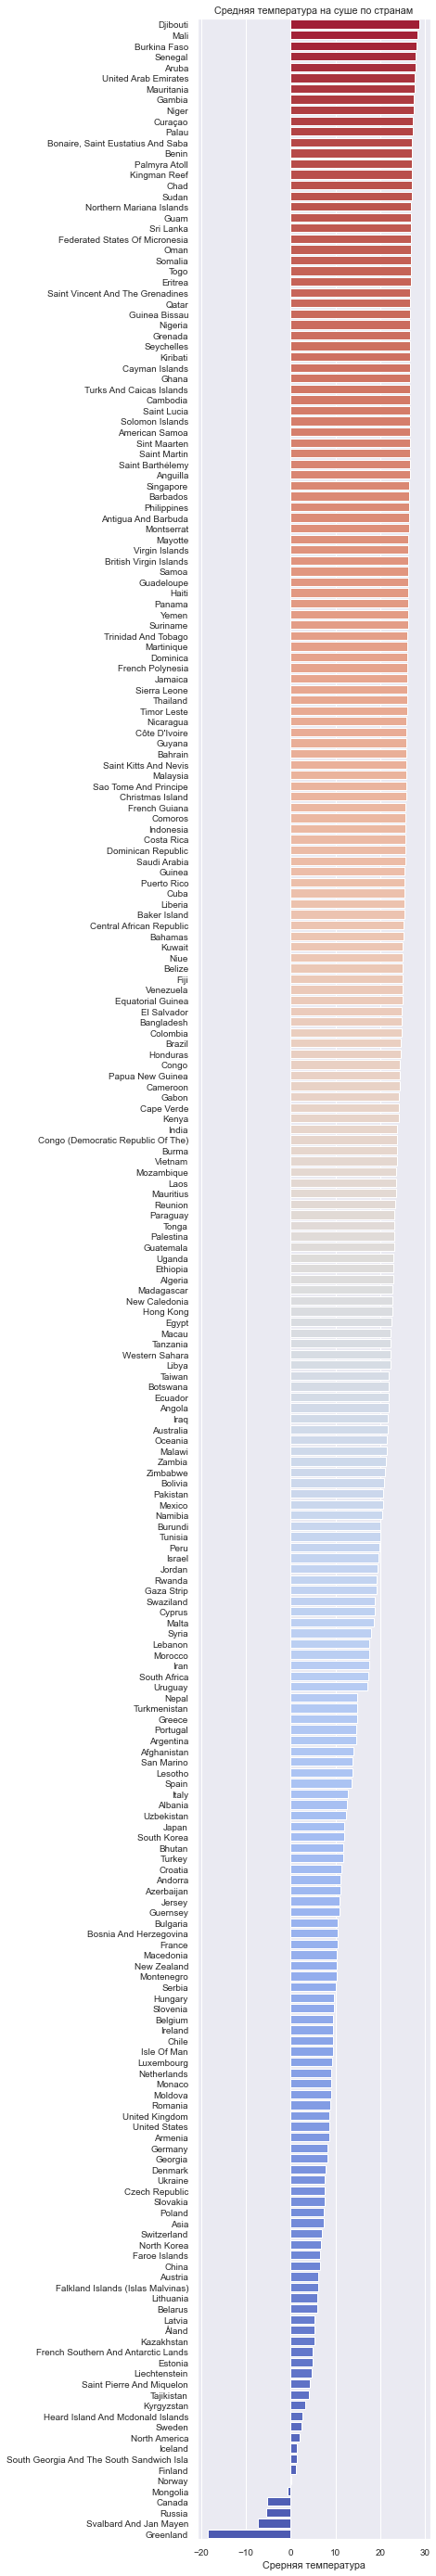

In [34]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Срерняя температура', title='Средняя температура на суше по странам')

<img src="Pictures/Разделитель.png">

# Обработка данных - проверка на стационарность

<img src="Pictures/Разделитель.png">

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

global_temp = pd.read_csv('GlobalTemperatures.csv')

*Библиотеки в каждом блоке загружала отдельно, т.к. блоки содержат разную аналитику(чтобы не загружать завершенный блок заново)*
Избавляюсь от пропущенных значений

In [28]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp.set_index('dt', inplace = True)
global_temp.dropna(how = 'any', inplace = True)
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [29]:
global_temp['LandAverageTemperature'].tail()

dt
2015-08-01    14.755
2015-09-01    12.999
2015-10-01    10.801
2015-11-01     7.433
2015-12-01     5.518
Name: LandAverageTemperature, dtype: float64

Для начала проверим, является ли этот временной ряд стационарным:
    
    Гипотеза по критерию Дики-Фуллера 
    H0 = нестационарный
    Н1 = стационарный

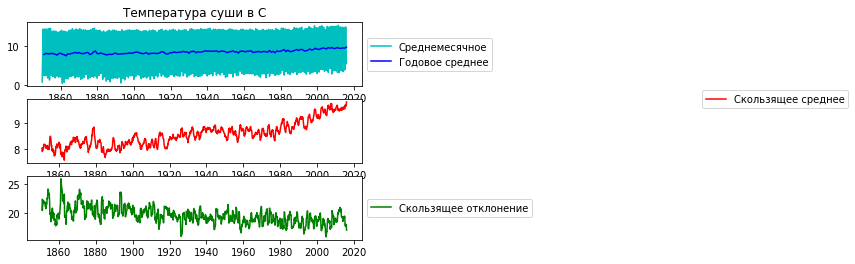

Результаты теста Дики-Фуллера по Среднемесячному:
Test Statistic                            -1.455328
p-value                                    0.555483
#Lags Used                                26.000000
Количество использованных наблюдений    1965.000000
Критическое значение (1%)                 -3.433682
Критическое значение (5%)                 -2.863012
Критическое значение (10%)                -2.567554
dtype: float64


In [31]:
fig = plt.figure()

plt.subplot(311)
plt.title('Температура суши в С')
plt.plot(global_temp['LandAverageTemperature'], color = 'c', label = 'Среднемесячное')
plt.plot(global_temp['LandAverageTemperature'].resample('A').mean(), color = 'b', label = 'Годовое среднее')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))



# Добавление скользящего среднего
rolmean = global_temp['LandAverageTemperature'].rolling(12).mean()
rolvar = global_temp['LandAverageTemperature'].rolling(12).var()

plt.subplot(312)
plt.plot(rolmean, label = 'Скользящее среднее', color = 'r')
plt.legend(loc='center left', bbox_to_anchor=(2, 1))

plt.subplot(313)
plt.plot(rolvar, label = 'Скользящее отклонение', color = 'g')
plt.legend(loc='center left', bbox_to_anchor=(2, 1ko))
plt.show()

# Дополненный тест Дики-Фуллера на стационарность.
def stationarity_test(s, name = None):
    if name != None:
        print('Результаты теста Дики-Фуллера по %s:'%name)
    else:
        print('Результаты теста Дики-Фуллера:')
    
    df_test = sm.tsa.stattools.adfuller(s)
    df_result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Количество использованных наблюдений'])
    for key,value in df_test[4].items():
        df_result['Критическое значение (%s)'%key] = value
    print(df_result)

stationarity_test(global_temp['LandAverageTemperature'], 'Среднемесячному')

Text(0.5, 0.98, 'Первоначальные данные о температуре')

<Figure size 432x288 with 0 Axes>

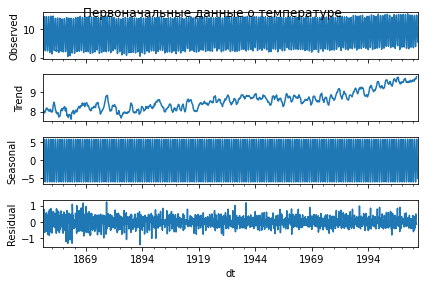

In [33]:
decomposition = sm.tsa.seasonal_decompose(global_temp['LandAverageTemperature'], model='additive')  
fig = plt.figure()  
fig = decomposition.plot()
plt.suptitle('Первоначальные данные о температуре')

Эти данные не являются стационарными.
Так как имеют тенденцию к росту и сильную сезонность
(что логично, т.к. это температура в течение года). 
Поэтому для начала попытаюсь убрать сезонность. 

Как видно ниже, только сезонная разница (12 месяцев) делает статистику 
теста стационарности меньше критических значений 1%.

In [35]:
temp_diff12 = global_temp['LandAverageTemperature'] - global_temp['LandAverageTemperature'].shift(12)
temp_diff12.dropna(inplace = True)
stationarity_test(temp_diff12, 'Температуре - разницей в 12 месяцев')

Результаты теста Дики-Фуллера по Температуре - разницей в 12 месяцев:
Test Statistic                         -1.278337e+01
p-value                                 7.334162e-24
#Lags Used                              2.400000e+01
Количество использованных наблюдений    1.955000e+03
Критическое значение (1%)              -3.433699e+00
Критическое значение (5%)              -2.863020e+00
Критическое значение (10%)             -2.567558e+00
dtype: float64


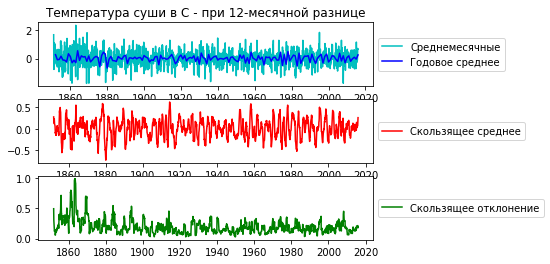

In [37]:
fig = plt.figure()

plt.subplot(311)
plt.title('Температура суши в С - при 12-месячной разнице')
plt.plot(temp_diff12, color = 'c', label = 'Среднемесячные')
plt.plot(temp_diff12.resample('A').mean(), color = 'b', label = 'Годовое среднее')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adding rolling mean
rolmean = temp_diff12.rolling(12).mean()
rolvar = temp_diff12.rolling(12).var()

plt.subplot(312)
plt.plot(rolmean, label = 'Скользящее среднее', color = 'r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.subplot(313)
plt.plot(rolvar, label = 'Скользящее отклонение', color = 'g')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Теперь видно, что полученный ряд стационарен, а значит, можно приступать к построению модели и прогнозированию

<img src="Pictures/Разделитель.png">

# Time serials с помощью алгоритма SARIMA


<img src="Pictures/Разделитель.png">